# Лабораторная 2. Линейные методы. Логистическая регрессия. 

In [94]:
# библиотеки
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_breast_cancer

## 1. Линейная регрессия 

***Линейная регрессия*** — это один из самых простых и популярных методов машинного обучения, используемый для прогнозирования числового значения на основе одного или нескольких входных признаков.

### 1. Постановка задачи

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

Где:
- $ \mathbf{w} = [w_1, w_2, \ldots, w_n]^\top $ — вектор весов,
- $ \mathbf{x} = [x_1, x_2, \ldots, x_n]^\top $ — вектор признаков,
- $ b $ — свободный член.

Вспомним из лекции, что ***аналитическое решение*** линейной регресии находится по формуле:

$$
w = (X^T X)^{-1} X^T y
$$

### Задача 1 (1 балл)

Рассмотрим датасет, содержащий следующую информацию

* **TV**: Инвестиции в рекламные кампании на телевидении.
* **radio**: Инвестиции в рекламные кампании на радио. 
* **newspaper**: Инвестиции в рекламные кампании в газетах.
* **newspaper**: Доход, полученный от рекламных кампаний.

$X = (X_{tv}, X_{radio}, X_{sales})$

$y = sales$

In [9]:
data = pd.read_csv('advertising.csv')
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


- Какое число объектов в данной выборке?
- Какое число признаков у каждого объекта?
- Какой признак имеет самую большую линейную зависимость с $y$
- Разбейте выборку на обучающую и тестовую.
- Найдите аналитическое решение на обучающей выборке и протестируйтесь на тестовой.
- Какие значения весов вы получили с помощью аналитического решения?

In [ ]:
# Ваш код

### 2. Градиентный спуск

$$
y = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n + b
$$

Или в матричной форме:

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

Решение с помощью ***градиентного спуска*** по формуле:

$$
w = w - \eta \cdot \nabla L(w)
$$

где:
- $w$ — вектор параметров модели,
- $\eta$ — скорость обучения (learning rate),
- $\nabla L(w)$ — градиент функции потерь, вычисленный как:
  $$
  \nabla L(w) = \frac{1}{n} \sum_{i=1}^{N} \nabla L(y_i, x_i, w)
  $$

где:
- $N$ — размер всего датасета
- $L$ — функция потерь.


$$L(w,X,y) = \frac{1}{N}||Xw - y||^2$$

$$\nabla L(w) = \frac{2}{N}X^T(Xw-y)$$

### Задача 2 (1 балл)

Дан датасет: $X = (1000, 3)$, $y = (1000)$

Дополните код ниже до реализации градиентного спуска. 

In [16]:
X = 2 * np.random.rand(1000, 3)
y = 4 + 3 * X + np.random.randn(1000, 1)

In [ ]:
# реализуем градиентный спуск для MSE
def gradient_descent(X, y, w, learning_rate, number_iterations):
    # список ошибки на каждой итерации 
    loss_iterations = []
    N = len(y)
    for i in range(number_iterations):
        # вычисляем градиент
        gradient = # ВАШ КОД
        # корректируем параметры
        w = # ВАШ КОД
        # вычисляем функцию потерь
        cost = np.mean((X.dot(w) - y) ** 2)
        loss_iterations.append(cost)

    return w, loss_iterations

# пример использования
# сгенерируем синтетические данные
X = 2 * np.random.rand(1000, 3)
y = 4 + 3 * X + np.random.randn(1000, 1)

# добавляем столбец с единицами для коэффициента сдвига (intercept)
X_w0 = np.c_[np.ones((1000, 1)), X]

# устанавливаем параметры
w = np.random.randn(4, 1)
learning_rate = 0.2
number_iterations = 50

# обучаем модель с использованием градиентного спуска
w, loss_iterations = gradient_descent(X_w0, y, w, learning_rate, number_iterations)

# визуализируем процесс обучения
import matplotlib.pyplot as plt
plt.plot(loss_iterations)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Training Process')
plt.show()

### Задача 3 (2 балла)

1. Реализуйте алгоритм стохастического градиентного спуска, описанный в лекции.
2. Разбейте выборку на обучающую и тестовую. 
3. С помощью стохастического градиентного спуска обучите линейную модель для датасета из задачи 2 (***на обучающей выборке***) и постройте три графика MSE (***для тестовой выборки***) от числа итераций для learning_rate = 0.05, learning_rate = 0.1, learning_rate = 0.2. Размер batch возьмите равным $\frac{N}{20}$.

In [ ]:
# Ваш код

### 3. Нормировка

***Нормировка признаков*** в задаче линейной регрессии нужна для улучшения сходимости алгоритма оптимизации и обеспечения корректного сравнения значений признаков: признаки с большими значениями могут преобладать над признаками с маленькими значениями, даже если их влияние на целевую переменную одинаково важно. Нормировка устраняет этот дисбаланс.

- **Стандартная нормировка** $x' = \frac{x - \mu}{\sigma}$, где $\mu$ — среднее, $\sigma$ — стандартное отклонение.
- **Мин-макс нормировка:** $x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$, где $x_{\text{min}}$ и $x_{\text{max}} $ — минимальное и максимальное значения признака.

In [ ]:
# Стандартизация признаков (нормировка)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Применение нормировка к обучающей выборке
X_test_scaled = scaler.transform(X_test)        # Применение тех же параметров к тестовой выборке

### Задача 4 (1 балл)

Реализуйте код ниже для датасета California Housing, используя готовую линейную модель из sklearn.linear_model.LinearRegression.

In [ ]:
# Загрузка датасета California Housing
data = fetch_california_housing()
X, y = data.data, data.target

# Разделение данных на обучающую и тестовую выборки
# ВАШ КОД

# Стандартизация признаков (нормировка)
# ВАШ КОД

# Обучение модели линейной регрессии
model = LinearRegression() # sklearn.linear_model.LinearRegression
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
# ВАШ КОД

# Оценка качества модели (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")

### 4. Регуляризация

Вспомним из лекции, что: 

L2-регрессия, также известная как **Ridge-регрессия**, добавляет к функции потерь штраф, пропорциональный сумме квадратов коэффициентов модели.

Функция потерь для Ridge-регрессии выглядит так:
$$
L(w) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \cdot \sum_{i=1}^d w_i^2
$$
где:
- $\alpha$ — коэффициент регуляризации (контролирует силу штрафа),
- $w_i$ — коэффициенты модели.
- $d$ - число признаков.
- $n$ - число объектов.

L1-регрессия, также известная как **Lasso-регрессия**, добавляет к функции потерь штраф, пропорциональный сумме модулей коэффициентов модели.

Функция потерь для Lasso-регрессии выглядит так:
$$
L(w) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \cdot \sum_{i=1}^d |w_i|
$$
где:
- $\alpha$ — коэффициент регуляризации,
- $w_i$ — коэффициенты модели.
- $d$ - число признаков.
- $n$ - число объектов.

In [81]:
# Ridge (L2-регуляризация) в sklearn
ridge_model = Ridge(alpha=0.1, random_state=42)

# Lasso (L1-регуляризация) в sklearn
lasso_model = Lasso(alpha=0.1, random_state=42)

In [74]:
data = pd.read_csv('Concrete Compressive Strength.csv')

y = data['Concrete compressive strength ']
X = data.drop(columns=['Concrete compressive strength '])

### Задача 5 (2 балла)

Дан датасет прочности бетона на сжатие (Concrete compressive strength ).

1. Разбейте выборку на обучающую и тестовую.
2. Отнормируйте X. 
3. Обучите линейную модель, L1 и L2 модель.
4. Протестируйте модели на тестовой выборке. Сделайте вывод. 

In [ ]:
# Ваш код

## 2. Линейная классификация (Логистическая регрессия)

***Логистическая регрессия*** является методом ***линейной классификации***, несмотря на то, что её название содержит слово "регрессия". Это связано с тем, что она использует линейную функцию для разделения данных в пространстве признаков. Однако, в отличие от линейной регрессии, логистическая регрессия применяется для задач классификации , а не для предсказания непрерывных значений.

### 1. Постановка задачи

***Обучающая выборка***: $(x_i, y_i)_{i=1}^n$, где:
  - $x_i \in \mathbb{R}^d$ — вектор признаков размерности $d$,
  - $y_i \in \{-1, +1\}$ — метка класса (бинарная классификация).

***Цель***:
$w \in \mathbb{R}^d$ и $b \in \mathbb{R}$ линейной модели:
$$
f(x) = w^T x + b
$$
так, чтобы минимизировать ошибки классификации.

***Решающее правило***:
$$
y = \text{sign}(f(x)) = 
\begin{cases} 
+1, & \text{если } f(x) > 0, \\
-1, & \text{если } f(x) \leq 0.
\end{cases}
$$


***Функция потерь:***

Для обучения линейной модели используется дифференцируемая функция потерь. Одна из наиболее популярных функций потерь для линейной классификации — **logistic loss**.

***Logistic Loss***:
$$
L(y, f(x)) = \log(1 + e^{-y \cdot f(x)})
$$

Где:
- $y \in \{-1, +1\}$— истинная метка,
- $f(x) = w^T x + b$ — предсказанная метка.

Общая функция потерь для всей обучающей выборки:
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^n \log(1 + e^{-y_i \cdot f(x_i)}) + \frac{\lambda}{2} \|w\|^2
$$


/tmp/ipykernel_824879/661578847.py:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X, y.astype(np.integer), clf=model, legend=2)


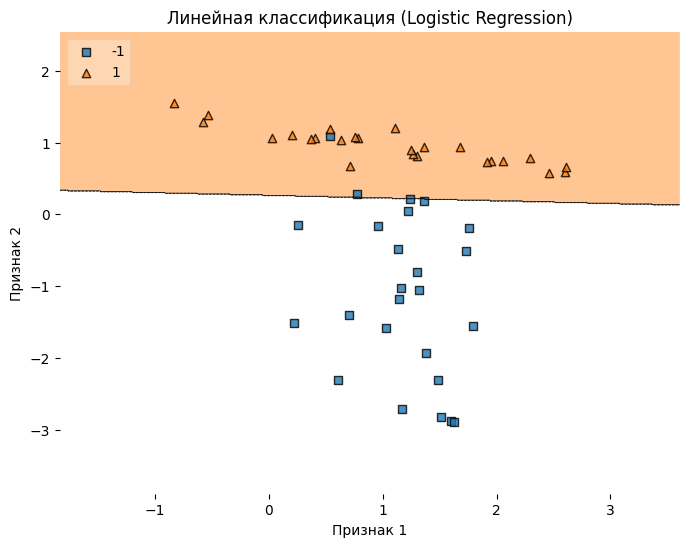

Точность модели: 1.0000


In [92]:
# Генерация синтетических данных
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Преобразование меток в {-1, +1}
y = 2 * y - 1

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # C = 1/λ
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Визуализация разделяющей гиперплоскости
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y.astype(np.integer), clf=model, legend=2)
plt.title('Линейная классификация (Logistic Regression)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Оценка качества
accuracy = np.mean(y_test == y_pred)
print(f"Точность модели: {accuracy:.4f}")

### Задача 6 (2 балла)

1. Для заданного датасета обучите логистическую регрессию. 
2. Постройте график зависимости точности на тестовой выборке от гиперпараметра C=[0.1, 0.2, 0.3 ... 1].

In [100]:
# Загрузка датасета
data = load_breast_cancer()
X, y = data.data, data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ваш код

### Задача 7 (1 балл)

Как с помощью логистической регрессии осуществить классификацию на несколько (более чем 2) класса?

Можете предложить не оптимальное решение, но главное рабочее.